In [ ]:
!pip install otter-grader==1.1.6

from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/hw/hw04

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ITEC419-fa22/hw/hw04


In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Homework 4: Functions, Tables, and Groups

This document is a modified version of HW04 at Data 8 of UC Berkeley. 
본 자료는 UC Berkeley의 Data 8의 HW04를 수정한 것입니다.

각 제공된 셀을 채워서 숙제를 완성하기 바랍니다. 항상 테스트할 때는 위의 셀들을 모두 실행하여 미리 제공된 테스트 데이터를 로드한 이후에 진행하기 바랍니다.

**본 과제를 수행하기 위해 필요한 참조 사이트:**
- [Python Reference](http://data8.org/sp22/python-reference.html): 본 과제에서 사용하는 파이썬의 배열 및 테이블 메소드에 대한 요약 표

**미리 읽어보기를 권장하는 자료:** 

* [Visualizing Numerical Distributions](https://www.inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html)
* [Functions and Tables](https://www.inferentialthinking.com/chapters/08/Functions_and_Tables.html)

여러분은 모든 문제에 대해서는 적절한 위치에 설명과 답변을 제시해야 합니다. **본 숙제에서 제공되는 셀에서 정의한 변수들은 절때 값을 변경하면 안됩니다.** 예를 들어, `max_temperature`에 대한 값을 구해야 할 경우에, 해당 질문에 제대로 답을 구했더라도 추후에 이 변수를 수정하면 검사에서 틀린 것으로 체크될 것입니다.

**숙제 기한:**

이 숙제의 기한은 10월 11일(화) 밤 11시 59분까지입니다. 10월 8일(토) 밤 11시 59분 이전에 제출할 경우에는 5점의 가점이 부여됩니다. **기한이 지난 이후에는 받지 않습니다.**

**Note:** 이 숙제에는 숨어있는 검사가 있습니다. 이는 모든 검사에서 통과되었더라도 최종 점수가 100%라는 것을 의미하지 않는다는 것입니다. 여러분이 제출한 숙제에 대하여 정답인지를 확인하기 위해서 추가적인 데이터로 검사를 진행합니다.

여러분의 답을 다른 학생과 직접적으로 공유하는 것은 허용하지 않습니다. 다만, 조교와 혹은 다른 학생들과 문제에 대하여 논의하는 것은 장려합니다. 서로 협력한 부분에 대해서는 해당 부분에 꼭 명기를 하기 바랍니다.

모든 숙제는 최대한 빠른 시일내에 시작해야 문제가 봉착되었을 때 도움을 받을 수 있는 충분한 시간을 확보할 수 있을 것입니다. 모든 질의는 LMS 시스템의 문의 게시판을 이용하고 개인적인 이메일에는 대응하지 않습니다.

## 1. Burrito-ful San Diego

In [ ]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

미라(Mira), 소피아(Sofia), 사라(Sara)는 데이터과학을 사용하여 샌디애고에서 부리또 맛집을 찾고자 합니다. 그들의 친구인 제시카(Jessica)와 소냐(Sonya)는 다음의 사이트로부터 구한 (정제된) 데이터로부터 샌디애고 지역에 있는 많은 부리또 가게에 대한 두 개의 무료 데이터세트를 제공하였습니다: https://www.kaggle.com/srcole/burritos-in-san-diego/data

다음의 셀은 부리또 식당의 이름, 옐프 평점(Yelp rating), 구글 평점(Google rating) 및 전체 평점을 포함하는 `ratings` 테이블을 읽습니다. `Overall` 평점은 `Yelp`와 `Google` 평점의 평균이 아니고, 위 연구에서 고객의 만족도 조사로부터 얻은 평점을 나타냅니다.

`burritos_types` 테이블도 읽습니다. 부리또 식당의 이름, 메뉴 항목, 그리고 각 메뉴 항목에 대한 가격을 포함하고 있습니다.

In [ ]:
# Just run this cell
ratings = Table.read_table("ratings.csv")
ratings.show(5)
burritos_types = Table.read_table("burritos_types.csv").drop(0)
burritos_types.show(5)

Name,Yelp,Google,Overall
Albertacos,3.5,3.9,3.45
Burrito Factory,4.5,4.8,3.5
Burros and Fries,3.5,4.1,3.575
Caliente Mexican Food,3.5,4.4,3.25
California Burrito Company,3.5,4.4,3.2


Name,Menu_Item,Cost
Albertacos,California,5.7
Albertacos,Carne Asada,5.25
"Alberto's 623 N Escondido Blvd, Escondido, CA 92025",Carne Asada,4.59
Burrito Box,Steak With Guacamole,11.5
Burrito Factory,Steak Everything,7.35


**Question 1.1.** 두 테이블의 정보를 결합할 수 있다면 좀 더 쉬울 것입니다. `burritos`에는 두 테이블을 join한 결과를 배정하여 모든 식당의 메뉴에 대해 평점을 가지고 있도록 합니다. 각 메뉴 항목은 해당 식당의 평점과 같습니다. **(8 Points)**

*Note:* 테이블 메소드의 인수로 어떤 테이블을 넣든 상관 없습니다. 두 순서 모두 괜찮습니다.

*Hint:* 만약 `join` 메소드를 사용하는데 도움이 필요하면 다음의 [Python Reference Sheet](http://data8.org/sp22/python-reference.html) 혹은 교재의 [Section 8.4](https://www.inferentialthinking.com/chapters/08/4/Joining_Tables_by_Columns.html)을 참조하기 바랍니다.

<!--
BEGIN QUESTION
name: q1_1
points:
 - 0
 - 0
 - 8
-->

In [ ]:
burritos = ...
burritos.show(5)

Name,Menu_Item,Cost,Yelp,Google,Overall
Albertacos,California,5.7,3.5,3.9,3.45
Albertacos,Carne Asada,5.25,3.5,3.9,3.45
Burrito Factory,Steak Everything,7.35,4.5,4.8,3.5
Burros and Fries,California,7.19,3.5,4.1,3.575
Burros and Fries,Carne Asada,6.89,3.5,4.1,3.575


In [ ]:
grader.check("q1_1")

All tests passed!

<!-- BEGIN QUESTION -->

**Question 1.2.** `burritos` 테이블에서 옐프 평점과 구글 평점에 대하여 살펴봅니다. 먼저 `Yelp`와 `Google`의 두 열로 구성된 `yelp_and_google` 테이블을 생성합니다. 그리고 x축에 옐프 평점을 y축에 구글 평점을 갖는 scatter plot을 그려봅니다.
 **(8 Points)**

<!--
BEGIN QUESTION
name: q1_2
manual: True
-->

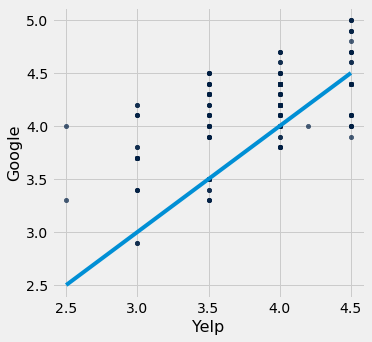

In [ ]:
yelp_and_google = ...
...
# Don't change/edit/remove the following line.
# To help you make conclusions, we have plotted a straight line on the graph (y=x).
plt.plot(np.arange(2.5,5,.5), np.arange(2.5,5,.5));

In [ ]:
grader.check("q1_2")

All tests passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.3.** Question 1.2에서 만든 scatter plot을 살펴봅니다. 어떠한 패턴을 찾을 수 있습니까? (즉, 두 타입의 점수 중 하나가 다른 것보다 일정하게 높다든가 하는) 만약 그렇다면 다음의 셀에 **간략하게** 이를 설명해봅니다. **(8 Points)**

<!--
BEGIN QUESTION
name: q1_3
manual: True
-->

_이 곳의 글을 지우고 여러분의 답을 작성하시오._

<!-- END QUESTION -->

여기에 `.group`이 어떻게 작동하는지에 대한 새로운 정보가 있습니다. `.group`이 어떻게 작동하는지를 이 [교재](https://www.inferentialthinking.com/chapters/08/2/Classifying_by_One_Variable.html)에서 확인하거나 혹은 아래의 동영상을 시청하기 바랍니다.

또한 [Table Functions Visualizer](http://data8.org/interactive_table_functions/)를 사용하여 `.group` 함수에 대한 더 많은 경험을 얻을 수 있습니다.


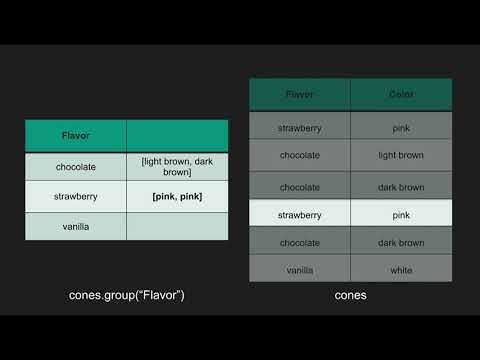

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("HLoYTCUP0fc")

**Question 1.4.** `burritos` 테이블에는 캘리포니아 부리또의 다양한 종류가 있습니다. 사라는 모든 식당에서 가장 높은 평점을 받은 유형이 무엇인지를 알고 싶어 합니다. 이 질문에 대한 답을 구하기 위해 각 메뉴 항목의 평점을 각 식당의 평점과 동일하게 취급하고 있는데, 이 식당들에서 모든 메뉴 하나하나에 평점을 가지고 있지 않기 때문입니다. 이에 대해 여러분은 신경쓸 필요가 없습니다. 다만, 그렇다는 이야기입니다. 

두 개의 열을 갖는 테이블을 하나 생성합니다: 첫 번째 열은 부리또의 이름을 포함하며, 두 번째 열은 식당 전체에서 부리또의 평균 평점을 포함해야 합니다. **여러분은 계산 과정에서 "California"라는 단어를 포함한 부리또만을 비교해야 합니다.** 예를 들어, "California" 부리또, "California Breafast" 부리또, "Cafifornia Surf And Turf" 부리또 등이 있습니다. **(9 Points)**

*Hint:* 만약 여러 식당에서 "California - Chicken" 부리또를 제공한다면, 테이블의 어떠한 메소드가 이들을 함께 aggregate하여 전체 평균 평점을 구할 수 있을까요?

*Note:* 참고로 조교는 한 줄짜리 답변을 사용합니다. 하지만, 여러분들은 여러 줄로 나눠서 답변을 작성해도 괜찮습니다. 다만, 최종 결과 테이블은 `california_burritos`에 저장되어야 합니다!

<!--
BEGIN QUESTION
name: q1_4
points:
 - 1
 - 1
 - 7
-->

In [ ]:
california_burritos = ...
california_burritos

Menu_Item,Overall average
California,3.5242
California (Only Cheese),4.1
California + Guac + Sour Cream,3.4
California - Chicken,3.45839
California - Pork Adobada,3.26429
California - Steak,3.26429
California Breakfast,2.75833
California Chicken,3.54815
California Chipotle,4.36667
California Everything,4.1


In [ ]:
grader.check("q1_4")

All tests passed!

**Question 1.5.** 새로 생성한 테이블 `california_burritos`에 대해 사라는 California 부리또 중에서 가장 평균 평점이 높은 것을 찾을 수 있습니다. 이 이름을 `best_california_burrito`에 저장하시오. 만약 이 조건을 만족하는 부리또가 여러개라면 그 중 하나만 출력해도 됩니다. **(8 Points)**

<!--
BEGIN QUESTION
name: q1_5
points:
 - 0
 - 8
-->

In [ ]:
best_california_burrito = ...
best_california_burrito

'California Chipotle'

In [ ]:
grader.check("q1_5")

All tests passed!

<!-- BEGIN QUESTION -->

**Question 1.6.** 미라는 샌디애고의 부리또는 버클리에 있는 부리또보다 더 싸고 맛이 있다고 생각합니다. `burritos` 테이블에서 샌디애고 부리또의 값의 분포를 가시화하는 히스토그램을 그리시오. 이때 히스토그램을 생성할 때 주어진 `bins` 변수를 사용하여 히스토그램이 시각적으로 보다 유용하도록 합니다. **(8 Points)**

<!--
BEGIN QUESTION
name: q1_6
manual: True
-->

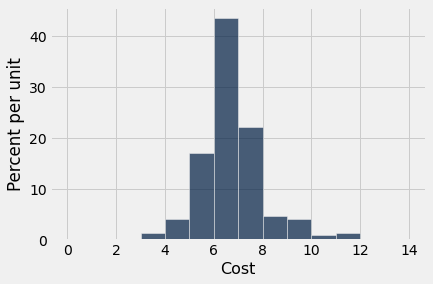

In [ ]:
bins = np.arange(0, 15, 1)
# Please also use the provided bins
...

<!-- END QUESTION -->

**Question 1.7.** 샌디애고의 부리또 중 몇 퍼센티지가 $6보다 작은가? `burritos_less_than_6`에 여러분의 답을 저장하시오. 그 값은 0과 100사이의 값입니다. 여러분은 답을 구하기 위해 위의 히스토그램만을 사용해야 합니다. 답을 구하기 위해 테이블에 대한 코드를 사용하지 말고, 높이를 눈으로 측정하고 Python으로 여러분의 산수를 평가하기 바랍니다. 
**(8 Points)**

*Note*: 여러분의 답변이 정확할 필요는 없지만, 정답의 몇 퍼센티지 내이어야 합니다.

<!--
BEGIN QUESTION
name: q1_7
manual: False
points:
 - 0
 - 8
-->

In [ ]:
burritos_less_than_6 = ...

In [ ]:
grader.check("q1_7")

All tests passed!

## 2. San Francisco City Employee Salaries

이 연습은 Table 메소드인 `.pivot`과 `.group`을 사용하는 실습을 위해 설계되었습니다. 빠르게 참조할려면 [Python Reference Sheet](http://data8.org/sp22/python-reference.html)을 참조하기 바랍니다.The [Table Function Visualizer](http://data8.org/interactive_table_functions/)이 도움이 될 것입니다.

테이블에서 어떻게 피봇을 사용할 수 있는지 데모를 보기 위해서 아래의 셀을 실행하십시오.

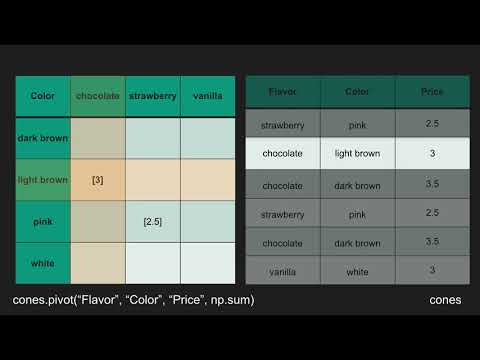

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("4WzXo8eKLAg")

이 homework에서 사용하는 데이터 소스는 샌프란시스코 시에 의해 [공개](https://data.sfgov.org/City-Management-and-Ethics/Employee-Compensation/88g8-5mnd/data)된 자료입니다.
우리는 관련된 열만 유지하기 위해 필터링 하고 2019년의 데이터로 한정시킵니다. 다음의 셀을 실행하여 데이터를 도르하여 `full_sf`라고 불리는 테이블에 저장합니다.



In [ ]:
full_sf = Table.read_table("sf2019.csv")
full_sf.show(5)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706


이 테이블에는 2019년 샌프란시스코 공무원 44, 525명 각각에 대하여 각 행에 저장되어 있습니다.

첫번째 4개의 열은 직원의 업무를 설명합니다. 예를 들어, 테이블의 세번째 줄에 있는 직원은 "IS Business Analyst-Senior"라는 직업을 가지고 있습니다. 우리는 이를 직원의 *직급(position)* 혹은 *직업(job title)*이라고 부릅니다.
이 직업은 정보 시스템(Information System)이라는 직업 군(Job Family)내에 있었으며(그래서 직업에 IS가 붙어 있음), 정부의 공공 보호 조직 그룹(Public Protection Organization Group)에 속한 성인 보호 부서(Adult Probation Department)에 있었습니다. 여러분은 대부분의 경우 `Job` 열로 작업하게 될 것입니다.

다음 세개의 열에는 급여, 초과 근무, 복리후생에 대해 2019년에 직원에게 지급된 달러 금액을 포함합니다. 직원의 급여에는 초과근무수당이 포함되지 않습니다.

마지막 열은 직원에게 지급된 총 보상금을 포함합니다. 이 값은 바로 앞 세 열의 합계입니다:

$$\text{Total Compensation} = \text{Salary} + \text{Overtime} + \text{Benefits}$$

이 숙제를 위해서 여러분은 다음의 열을 사용할 것입니다:
1. `Organization Group`: 부서들의 모임입니다. 예를 들어, **Public Protection** Org. Group은 경찰, 소방, 성인 보호, 지방 검사 등의 부서가 포함됩니다.
2. `Department`: 샌프란시스코 시와 카운티에서 사용하는 기본 조직 단위입니다.
3. `Job`: 주어진 작업자들이 채우는 특정 직책입니다.
4. `Total Compensation`: 2019년 근로자의 급여, 초과근무 및 복리후생비를 합한 금액입니다.

다음의 셀을 실행하여 관련 열을 선택하고 `sf`라는 새 테이블을 생성합니다.

In [ ]:
sf = full_sf.select("Job", "Department", "Organization Group",  "Total Compensation")
sf.show(5)

Job,Department,Organization Group,Total Compensation
IS Trainer-Journey,Adult Probation,Public Protection,131391
IS Engineer-Assistant,Adult Probation,Public Protection,172520
IS Business Analyst-Senior,Adult Probation,Public Protection,162468
IS Business Analyst-Principal,Adult Probation,Public Protection,216706
IS Programmer Analyst,Adult Probation,Public Protection,98706


우리는 각 **Organization Group**에 소속된 구성원의 직업에 대한 배열을 생성하기 위해 이 테이블을 사용합니다.

**Question 2.1.** 두 개의 열을 가진 `job_titles` 이름의 테이블을 생성합니다. 첫번째 열은 `Organization Group`이고, 모든 "Organization Group"의 이름은 한번만 나와야 하며, 두 번째 열은 해당 "Organization Group" 내의 모든 직책 이름을 *배열*로 포함해야 합니다. 같은 직책 이름이 중복되어 있어도 상관없습니다. **(9 Points)**

*Hint:* `group`이 어떻게 작동하는지 생각해보기 바랍니다: 이는 값을 배열로 모은 후에 해당 배열에 함수를 적용합니다. 여러분을 위해서 두 개의 함수를 정의하였고, `group`을 호출할 때 이 중의 하나를 사용해야 할 것입니다.

<!--
BEGIN QUESTION
name: q2_1
points:
 - 0
 - 0
 - 0
 - 0
 - 4
 - 5
-->

In [ ]:
# Pick one of the two functions defined below in your call to group.
def first_item(array):
    '''Returns the first item'''
    return array.item(0)

def full_array(array):
    '''Returns the array that is passed through'''
    return array 

# Make a call to group using one of the functions above when you define job_titles
job_titles = ...
job_titles

Organization Group,Job full_array
Community Health,"['Painter Supervisor 1' 'Painter' 'Painter' ..., 'Nursin ..."
Culture & Recreation,['Electrician' 'Executive Secretary 2' 'Bldgs & Grounds ...
General Administration & Finance,"['Painter' 'Painter' 'Electrician' ..., 'Investigator, T ..."
Human Welfare & Neighborhood Development,['Dept Head I' 'Administrative Analyst' 'Community Devel ...
Public Protection,['IS Trainer-Journey' 'IS Engineer-Assistant' 'IS Busine ...
"Public Works, Transportation & Commerce",['Heavy Equip Ops Asst Sprv' 'Heavy Equipment Ops Sprv' ...


In [ ]:
grader.check("q2_1")

All tests passed!

#### 2.1에서 작성한 코드를 이해하는 것은 이 수업을 진행함에 중요합니다! 만약 여러분이 운좋게 답을 작성하였다면, 코드를 단계별로 살펴보는 시간을 갖는 것이 중요합니다!


<!-- BEGIN QUESTION -->

**Question 2.2.** 현재 `sf` 테이블의 `Job`열은 정렬되지 않았습니다. (특별한 순서는 없습니다.) 이전 질문에서 `Job`열에서 생성한 배열이 이를 생성하기 전에 이미 알파벳 순으로 정렬되어 있었다면 같은 결과를 얻었을까요? 여러분의 대답을 설명하세요. 점수를 모두 받을려면 `.group` 메소드가 *어떻게* 작동하는지, `Jobs` 열을 정렬하는 것이 이에 미치는 영향은 어떠한지를 설명해야 할 것입니다. **(8 Points)**

*Note:* 두 배열은 동일한 수의 항을 포함하고 두 배열의 해당 인덱스에 위치한 항이 동일한 경우 **동일**합니다. 예를 들어 다음 배열은 동일하지 않습니다:  `array([1,2]) != array([2,1])`.

<!--
BEGIN QUESTION
name: q2_2
manual: True
-->

_이 곳의 글을 지우고 여러분의 답을 작성하시오._

<!-- END QUESTION -->

**Question 2.3.** `department_ranges`는 행에는 부서(departments), 열에는 조직 그룹(organization groups)을 포함하는 테이블을 설정합니다. 행의 값은 총 보상 범위 (compensation range)에 해당해야 하며, 이때 범위는 **해당 조직 그룹에 대한 부서에서 최고 총 보상과 최저 총 보상 간의 차이**로 정의됩니다. **(9 Points)**

*Hint 1:* 여러분은 `compensation_range`라는 새로운 함수를 정의할 필요가 있습니다. 이 함수는 보상 배열을 받아서 해당 배열의 보상 범위를 리턴합니다.

*Hint 2:* 새 테이블의 행과 열을 지정하는 테이블 함수는 무엇입니까? 이번 숙제의 앞에서 제시하고 있는 동영상을 볼 필요가 있습니다!

<!--
BEGIN QUESTION
name: q2_3
manual: False
points:
 - 0
 - 0
 - 2
 - 7
-->

In [ ]:
# Define compensation_range first
...
    ...

department_ranges = ...
department_ranges

Department,Community Health,Culture & Recreation,General Administration & Finance,Human Welfare & Neighborhood Development,Public Protection,"Public Works, Transportation & Commerce"
Academy Of Sciences,0,199121,0,0,0,0
Administrative Services,0,0,478784,0,0,0
Adult Probation,0,0,0,0,303419,0
Airport Commission,0,0,0,0,0,445092
Art Commission,0,251823,0,0,0,0
Asian Art Museum,0,298230,0,0,0,0
Assessor,0,0,277385,0,0,0
Board Of Appeals,0,0,0,0,0,243582
Board Of Supervisors,0,0,293773,0,0,0
Building Inspection,0,0,0,0,0,340852


In [ ]:
grader.check("q2_3")

All tests passed!

<!-- BEGIN QUESTION -->

**Question 2.4.** 바로 직전 질의에서 구한 `department_ranges` 테이블에서 어떤 행의 값이 `0`인 이유를 설명하시오. **(8 Points)**
<!--
BEGIN QUESTION
name: q2_4
manual: True
-->

_이 곳의 글을 지우고 여러분의 답을 작성하시오._

<!-- END QUESTION -->

**Question 2.5.** `sf` 테이블에서 표시되는 부서 중에서 평균 총 보수가 12만5000달러 이상인 부서 수를 찾아 이 값을 `num_over_125k`에 배정하시오. **(9 Points)**

*Hint:* 제공된 변수 이름은 중간 단계와 일반적인 사고 과정을 안내하는데 도움이 됩니다. 처음부터 시작하고 싶다면 자유롭게 삭제해도 됩니다. 그러나 최종 답변은 변수 `num_over_125k`에 할당되어 있어야 합니다!

<!--
BEGIN QUESTION
name: q2_5
manual: False
points:
 - 2
 - 2
 - 5
-->

In [ ]:
depts_and_comp = ...
avg_of_depts = ...
num_over_125k = ...
num_over_125k

23

In [ ]:
grader.check("q2_5")

All tests passed!

숙제 04이 완료되었습니다! 

**중요한 숙제 제출 단계:**
1. 테스트를 실행하고 모두 통과했는지 확인합니다.
2. **File** 메뉴에서 **Save and pin revision**을 선택한 다음 **마지막 셀을 실행**합니다.
3. 링크를 클릭하여 zip 파일을 다운로드합니다.
4. LMS를 통해 숙제를 제출합니다. 만약 여러번 제출할 경우에는 마지막으로 제출된 것만을 고려할 것입니다.

---

다시한번 체크하기 위해서 아래의 셀을 통해 자동채점 테스트를 모두 한번 더 실행합니다.

In [ ]:
grader.check_all()

## Submission

아래 셀을 실행하기 전에 노트북의 모든 셀을 순서대로 실행했는지 확인하여 모든 이미지/그래프가 출력에 나타나도록 하십시오. 아래 셀은 제출할 zip 파일을 생성합니다. **내보내기 전에 저장하십시오!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)